# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $
\sum{X_2^2}
$
    - $
\sum{X_2 \cdot y}
$
    - $
\sum{X_1 \cdot X_2}
$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2}
$$

- Что вы можете сказать? Что произошло с коэффициентом?

### Решение

 - $
\sum{X_2^2}=\sum{(\mu X_1)^2}=\mu^2\sum{X_1^2}
$
 - $
\sum{X_2 \cdot y}=\mu\sum{X_1\cdot y}
$
 - $
\sum{X_1 \cdot X_2} = \sum{X_1 \cdot \mu X_1}=\mu\sum{X_1^2}
$

Выразим $\beta_2$:
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \mu^2\sum{X_1^2} - \mu\sum{X_1\cdot y} \cdot \mu\sum{X_1^2}}{\sum{X_1^2} \cdot \mu^2\sum{X_1^2} - (\mu\sum{X_1^2})^2}=\frac{\mu^2\sum{X_1 \cdot y}\sum{X_1^2} - \mu^2\sum{X_1 \cdot y}\sum{X_1^2}}{\mu^2(\sum{X_1^2})^2 - \mu^2(\sum{X_1^2})^2} = \frac{0}{0}
$$

Видим, что коэффицент $\beta_2$ не определен. Таким образом, в ситуации абсолютной линейной зависимости переменных (полной мультиколлинеарности) мы не можем однозначно оценить параметры регрессии.

### №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $
\hat{\gamma} 
$  
    - $
\hat{\gamma} - \gamma
$  
    - $
\hat{\beta} 
$
    - $
\hat{\beta} - \beta
$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

### Решение 

- $
\hat{\gamma} = \frac{cov(x_{t-1}, x_{t})}{var(x_{t-1})}=\frac{cov(x_{t-1}, \theta + x_{t-1} \cdot \gamma + u_t)}{var(x_{t-1})}
=\frac{\gamma cov(x_{t-1}, x_{t-1})}{var(x_{t-1})} + \frac{cov(x_{t-1}, u_{t})}{var(x_{t-1})}
= \frac{\gamma var(x_{t-1})}{var(x_{t-1})} + \frac{cov(x_{t-1}, u_{t})}{var(x_{t-1})}
= \gamma + \frac{cov(x_{t-1}, u_{t})}{var(x_{t-1})}
$  
- $
\hat{\gamma} - \gamma = \frac{cov(x_{t-1}, u_{t})}{var(x_{t-1})}
$  
- $
\hat{\beta} = 
\frac{cov(x_{t-1}, r_{t})}{var(x_{t-1})}=\frac{cov(x_{t-1}, \alpha + x_{t-1} \cdot \beta + \varepsilon_t)}{var(x_{t-1})}
=\frac{\beta cov(x_{t-1}, x_{t-1})}{var(x_{t-1})} + \frac{cov(x_{t-1}, \varepsilon_t)}{var(x_{t-1})}
= \frac{\beta var(x_{t-1})}{var(x_{t-1})} + \frac{cov(x_{t-1}, \varepsilon_t)}{var(x_{t-1})}
= \beta + \frac{cov(x_{t-1}, \varepsilon_t)}{var(x_{t-1})}
= \beta + \frac{cov(x_{t-1}, \phi \cdot u_t + w_t)}{var(x_{t-1})} 
= \beta + \frac{\phi cov(x_{t-1}, u_t)}{var(x_{t-1})} + \frac{cov(x_{t-1}, w_t)}{var(x_{t-1})}
= \beta + \phi \cdot (\hat{\gamma} - \gamma)
$

В качестве $\phi$ возьмем ее оценку $\hat \phi$:  
- $\hat \phi = \frac{cov(u_t, \varepsilon_t)}{var(u_t)}$  

Таким образом, получаем:
- $
\hat{\beta} - \beta = \frac{cov(u_t, \varepsilon_t)}{var(u_t)}\cdot (\hat{\gamma} - \gamma)
$  

Вывод:   
Таким образом, видим, что оценка $\hat{\beta}$ имеет смещение. В указанной статье [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/) показано, что оценка $\hat{\gamma}$ занижена, а $cov(u_t, \varepsilon_t)$ отрицательна => $\hat{\beta}$, наоборот, завышена ($\hat{\beta} - \beta$ имеет положительный знак).  

Используемые предпосылки:
1. Модель линейна по параметрам и правильно специфицирована.
2. $x$ - детерминированная величина (нет зависимости со случайным членом $w$, т.е отсутсвует проблема эндогенности)



## №3 (60 баллов)

- Давайте вернемся к уже известному датасету с машинами

In [3]:
import pandas as pd

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [2]:
df = pd.read_csv('HW_002_001.csv')

In [3]:
df.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


- Вы уже пытались построить всякие разные модификации линейной регресии
- Давайте же попробуем сделать опять все то же самое (можете взять ту модель, которую успели сделать на занятии)

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Построим модель, как за занятии, дополняя некоторыми переменными, которые улучшают качество ($Adj. R-squared$):

In [5]:
df_ = pd.DataFrame()
df_['price'] = np.log(df.price)
df_['mpg'] = 1/df.mpg
df_ = pd.concat([df_, pd.get_dummies(df.rep78.astype('Int64'), prefix='rep')], axis=1)
df_['headroom'] = df['headroom']
df_['trunk'] = df['trunk']
df_['weight'] = df['weight']
df_['weight_log'] = np.log(df['weight'])
df_['length'] = df['length']
df_['length_log'] = np.log(df['length'])
df_['turn'] = df['turn']
df_['displacement'] = df['displacement']
df_['gear_ratio'] = df['gear_ratio']
df_['gear_ratio_sqr'] = df['gear_ratio']**2
df_ = pd.concat([df_, pd.get_dummies(df.foreign, prefix='foreign')], axis=1)
df_.head()

,price,mpg,rep_1,rep_2,rep_3,rep_4,rep_5,headroom,trunk,weight,weight_log,length,length_log,turn,displacement,gear_ratio,gear_ratio_sqr,foreign_Domestic,foreign_Foreign
0,8.318498,0.045455,0,0,1,0,0,2.5,11,2930,7.982758,186,5.225747,40,121,3.58,12.8164,1,0
1,8.465689,0.058824,0,0,1,0,0,3.0,11,3350,8.116716,173,5.153292,40,258,2.53,6.4009,1,0
2,8.242493,0.045455,0,0,0,0,0,3.0,12,2640,7.878534,168,5.123964,35,121,3.08,9.4864,1,0
3,8.479699,0.050000,0,0,1,0,0,4.5,16,3250,8.086410,196,5.278115,40,196,2.93,8.5849,1,0
4,8.965335,0.066667,0,0,0,1,0,4.0,20,4080,8.313852,222,5.402677,43,350,2.41,5.8081,1,0


In [6]:
model = smf.ols('price ~ mpg + rep_3  + headroom + trunk + weight + weight_log + length + length_log + turn + foreign_Domestic', data = df_).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     18.35
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           3.86e-15
Time:                        15:39:51   Log-Likelihood:                 15.262
No. Observations:                  74   AIC:                            -8.523
Df Residuals:                      63   BIC:                             16.82
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -75.3438     22.676     -3.323      0.001    -120.657     -30.030
mpg                  7.3053      4.125      1.771      0.081      -0.938      15.548
rep_3               -0.1045      0.059     -1.766      0.082      -0.223       0.014
headroom            -0.0893      0.040     -2.241      0.029      -0.169      -0.010
trunk                0.0248      0.011      2.215      0.030       0.002       0.047
weight               0.0033      0.001      6.399      0.000       0.002       0.004
weight_log          -8.1098      1.527     -5.312      0.000     -11.161      -5.059
length              -0.1848      0.040     -4.570      0.000      -0.266      -0.104
length_log          33.3579      7.345      4.542      0.000      18.680      48.036
turn                -0.0301      0.013     -2.360      0.021      -0.056      -0.005
foreign_Domestic    -0.3222      0.081     -3.976      0.000      -0.484      -0.160
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.515
Skew:                           0.146   Prob(JB):                        0.469
Kurtosis:                       2.362   Cond. No.                     3.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Расскажите немного, почему вы выбрали именно эти переменные
- Какие зависимости вы ожидали увидеть? Можете подкрепить свои гипотезы графиками
- Как зависимости в итоге увидели? Как вы считаете почему?

Выбор переменных проводился с помощью графиков зависимости целевой переменных от всех возможных регрессоров.
Сначала построили распределение целевой переменной ('price') и увидели, что она похожа на логарифм:

Text(0, 0.5, 'n')

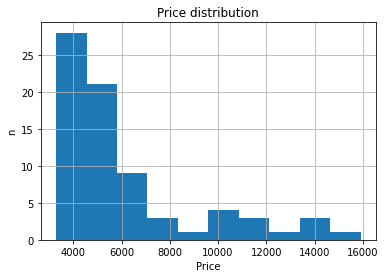

In [7]:
df.price.hist()
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('n')

Затем провели анализ зависимостей целевой переменной от всех возможных регрессоров. Увидели, что: 
- `mpg` имеет гиперболический вид, а значит лучше будет включить в качестве переменной ее обратную величину;
- имеет смысл включить в рассмотрение квадрат `gear_ratio`, так как прослеживается параболическая зависимость;
- захотелось добавить логарифмы `weight` и `length`, так как наблюдается скученность (проявляются выбросы).
- по всем остальным переменным явных зависимостей не просматривается, поэтому их включили только в "чистом виде".

Также, были включены категориальные признаки (`rep` и `foreign`) в виде dummy-переменных.

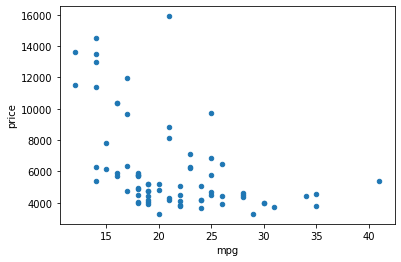

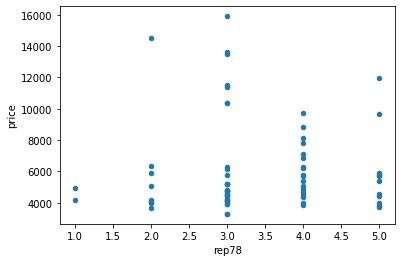

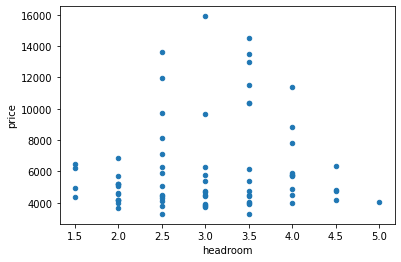

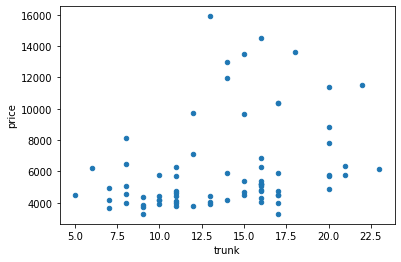

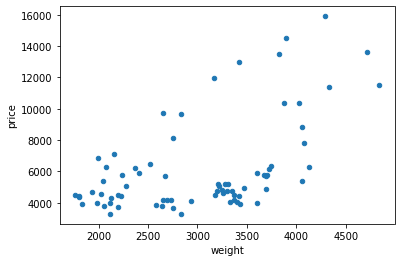

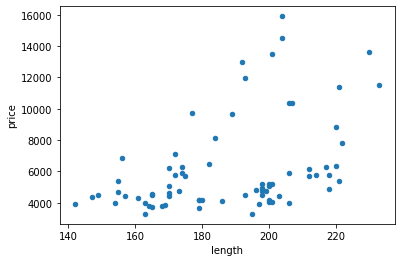

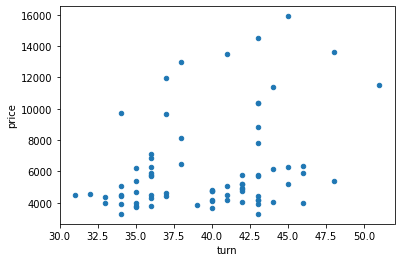

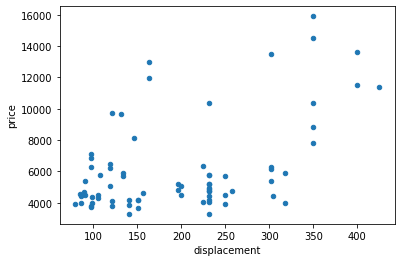

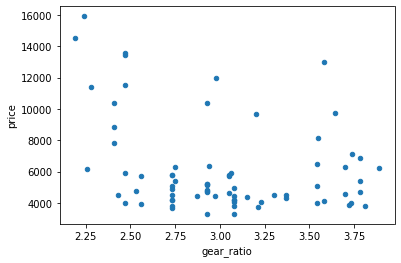

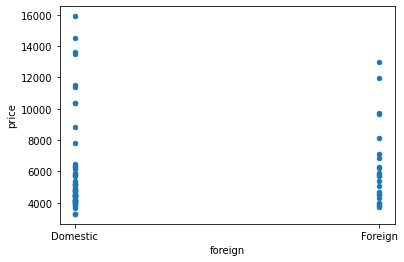

In [8]:
for col in df.columns:
    if col != 'price' and col != 'make':
        df.plot.scatter(col, 'price')

Какие зависимости ожидали увидеть и что увидели:
- обратную зависимость от пробега (чем больше автомобиль проехал, тем хуже его состояние и тем ниже должна быть цена), но модель говорит о прямой зависимости (положительный коэффициент при `mpg`);
- обратную зависимость от переменной `rep78` (чем чаще ремонт, тем хуже состояние авто);
- прямую зависимость от размера багажника `trunk` (чем больше багажник, тем лучше - выше цена);
- прямую зависимость от веса `weight` и длины `length`, а также их логарифмов (т.к. чем больше вес и длина авто, тем он больше и на него нужно потратить больше материалов, которые в то время стоили довольно дорого), но для `length` и `weight_log` этого не происходит;
- для остальных переменных, которые вошли в модель, сложновато заранее решить, как они должны себя вести.

Отличие знаков коэффициентов от здравого смысла можно объяснить возможной мультиколлинеарностью переменных, которая, как известно, может провоцировать нестабильное поведение оценок регрессии. На это указывает и подсказка в summary модели ("The condition number is large, 3e+06").

- Теперь же давайте посмотрим на данную модель немного скептически
- Вы прошли предпосылки теоремы Г.М. и знаете о том, как тестировать на наличие нарушений этих предпосылок, как исправлять их, если возможно, и какие последствия они могут нести
- Собственно, давайте их и проверим

- Перед тем как бездумно проверять на все подряд, предположите, какие именно предпосылки могут быть нарушение
- Обоснуйте свои предпосылки. Почему вы так считаете? 
- Какие еще графики можно построить, чтобы сделать диагностику модели?
- Можно ли как-то "починить" модель, если было обнаружено нарушение предпосылки теоремы Г.М.? 
- Используйте один или больше методов борьбы с нарушениями предпосылок Гаусса-Маркова, которые мы обсуждали на парах
- Убедитесь, что вы проверили все нарушения предпосылок Гаусса-Маркова. Если одна из предпосылок всё ещё встречается, повторите предыдущий пункт

Предполагаемые нарушения:
- мультиколлинеарность - об этом свидетельствуют отличающиеся от нашей интуиции знаки у некоторых коэффициентов, а также подсказка в summary модели ("The condition number is large, 3e+06");
- гетероскедастичность (неоднородность дисперсии ошибок) - так как используем в модели переменные с неоднородной дисперсией (например, `weight`, `length`)
- сказать что-то об эндогенности и автокорреляции сложно - надо проверять.

Построим некоторые графики для диагностики проблем.  
Для детектирования мультиколлинеарности построим *heatmap* (матрицу корреляции):

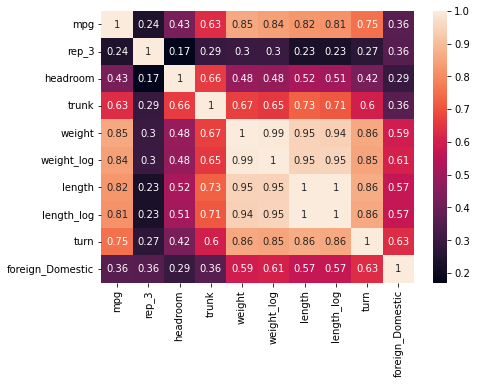

In [34]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_[np.delete(model.params.index.values, 0)].corr(), annot=True);

Видим, что имеется квадрат явно скоррелированных величин (`weight`, `weight_log`, `length`, `length_log`, `turn`), а также к ним присоединяется `mpg`. Все это указывает на проблемы с мультиколлинеарностью.

Для детектирования проблемы гетероскедастичности построим график остатков (ошибок) 

<AxesSubplot:>

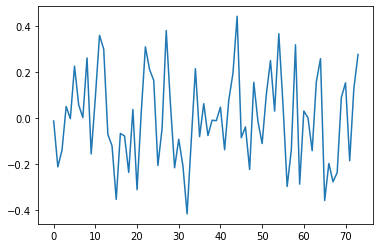

In [35]:
model.resid.plot()

Кажется, что проблема есть, но уверенности в этом нет. Построим еще график квадратов остатков:

<AxesSubplot:>

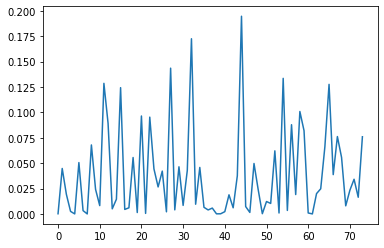

In [37]:
(model.resid**2).plot()

Вот тут проблема гетероскедастичности становится более отчетлива.

Попробуем починить модель, избавившись от нарушений предпосылок Гаусса-Маркова.   
Начнем с мультиколлинеарности => подсчитаем VIF для каждой из оставшихся переменных и удалим те из них, у которых VIF будет слишком большим (> 10), контролируя еще *condition number* (хорошо бы, чтобы было < 100):

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
exog = np.delete(model.params.index.values, 0)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_[exog], i) for i in range(len(exog))]

# VIF results in a table
vif["features"] = exog
vif.round(1).sort_values('VIF')

,VIF,features
1,2.2,rep_3
9,7.4,foreign_Domestic
2,24.9,headroom
3,36.1,trunk
0,74.1,mpg
8,412.1,turn
4,2174.8,weight
6,5334.9,length
5,127045.9,weight_log
7,145725.3,length_log


In [74]:
model_1 = smf.ols('price ~ mpg + rep_3  + headroom + trunk + weight + weight_log + length + turn + foreign_Domestic', data = df_).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     13.85
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           4.73e-12
Time:                        19:13:38   Log-Likelihood:                 4.7826
No. Observations:                  74   AIC:                             10.43
Df Residuals:                      64   BIC:                             33.48
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.4621      6.389      3.829      0.000      11.699      37.225
mpg                  7.2027      4.715      1.528      0.132      -2.217      16.622
rep_3               -0.0446      0.066     -0.677      0.501      -0.176       0.087
headroom            -0.1005      0.045     -2.212      0.031      -0.191      -0.010
trunk                0.0076      0.012      0.630      0.531      -0.016       0.032
weight               0.0013      0.000      4.193      0.000       0.001       0.002
weight_log          -2.2464      0.932     -2.411      0.019      -4.108      -0.385
length              -0.0022      0.005     -0.443      0.660      -0.012       0.008
turn                -0.0346      0.015     -2.385      0.020      -0.064      -0.006
foreign_Domestic    -0.3706      0.092     -4.036      0.000      -0.554      -0.187
==============================================================================
Omnibus:                        4.286   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.246
Skew:                           0.572   Prob(JB):                        0.120
Kurtosis:                       2.740   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что *condition number* уменьшился, но все-еще велик (проблема мультиколлинеарности все еще есть), но также уменьшилось и качество. Продолжим:

In [75]:
exog = exog[exog != 'length_log']

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_[exog], i) for i in range(len(exog))]

# VIF results in a table
vif["features"] = exog
vif.round(1).sort_values('VIF')

,VIF,features
1,2.2,rep_3
8,7.1,foreign_Domestic
2,24.7,headroom
3,35.4,trunk
0,74.1,mpg
4,181.4,weight
7,394.8,turn
5,464.3,weight_log
6,1019.9,length


In [76]:
model_1 = smf.ols('price ~ mpg + rep_3  + headroom + trunk + weight + weight_log + turn + foreign_Domestic', data = df_).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     15.75
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.25e-12
Time:                        19:13:38   Log-Likelihood:                 4.6695
No. Observations:                  74   AIC:                             8.661
Df Residuals:                      65   BIC:                             29.40
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           25.3248      6.046      4.189      0.000      13.250      37.400
mpg                  7.2265      4.686      1.542      0.128      -2.131      16.584
rep_3               -0.0364      0.063     -0.579      0.565      -0.162       0.089
headroom            -0.1001      0.045     -2.216      0.030      -0.190      -0.010
trunk                0.0054      0.011      0.492      0.624      -0.016       0.027
weight               0.0013      0.000      4.247      0.000       0.001       0.002
weight_log          -2.3953      0.863     -2.774      0.007      -4.120      -0.671
turn                -0.0369      0.014     -2.731      0.008      -0.064      -0.010
foreign_Domestic    -0.3693      0.091     -4.049      0.000      -0.551      -0.187
==============================================================================
Omnibus:                        4.655   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.551
Skew:                           0.602   Prob(JB):                        0.103
Kurtosis:                       2.841   Cond. No.                     6.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model_2 = smf.ols('price ~ headroom + weight + weight_log + turn + foreign_Domestic', data = df_).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     24.60
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           4.68e-14
Time:                        19:18:37   Log-Likelihood:                 2.9968
No. Observations:                  74   AIC:                             6.006
Df Residuals:                      68   BIC:                             19.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           25.7673      5.995      4.298      0.000      13.804      37.731
headroom            -0.0871      0.038     -2.273      0.026      -0.164      -0.011
weight               0.0015      0.000      4.879      0.000       0.001       0.002
weight_log          -2.4723      0.855     -2.890      0.005      -4.179      -0.765
turn                -0.0318      0.013     -2.413      0.019      -0.058      -0.006
foreign_Domestic    -0.4362      0.082     -5.336      0.000      -0.599      -0.273
==============================================================================
Omnibus:                        4.075   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.008
Skew:                           0.558   Prob(JB):                        0.135
Kurtosis:                       2.765   Cond. No.                     6.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, аналогичную картину - продолжаем:

In [77]:
exog = exog[exog != 'length']

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_[exog], i) for i in range(len(exog))]

# VIF results in a table
vif["features"] = exog
vif.round(1).sort_values('VIF')

,VIF,features
1,2.0,rep_3
7,7.1,foreign_Domestic
2,24.7,headroom
3,30.4,trunk
0,74.1,mpg
4,109.8,weight
5,217.1,weight_log
6,358.4,turn


In [78]:
model_1 = smf.ols('price ~ mpg + rep_3  + headroom + trunk + weight + weight_log + foreign_Domestic', data = df_).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     15.43
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           8.69e-12
Time:                        19:13:39   Log-Likelihood:                0.65125
No. Observations:                  74   AIC:                             14.70
Df Residuals:                      66   BIC:                             33.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.0425      6.274      3.673      0.000      10.516      35.569
mpg                  4.7876      4.819      0.993      0.324      -4.835      14.410
rep_3               -0.0239      0.066     -0.364      0.717      -0.155       0.107
headroom            -0.0975      0.047     -2.062      0.043      -0.192      -0.003
trunk                0.0034      0.011      0.303      0.763      -0.019       0.026
weight               0.0012      0.000      3.595      0.001       0.001       0.002
weight_log          -2.2010      0.902     -2.441      0.017      -4.001      -0.401
foreign_Domestic    -0.4591      0.089     -5.151      0.000      -0.637      -0.281
==============================================================================
Omnibus:                        5.926   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.638
Skew:                           0.675   Prob(JB):                       0.0597
Kurtosis:                       3.059   Cond. No.                     6.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
exog = exog[exog != 'turn']

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_[exog], i) for i in range(len(exog))]

# VIF results in a table
vif["features"] = exog
vif.round(1).sort_values('VIF')

,VIF,features
1,2.0,rep_3
6,6.3,foreign_Domestic
2,24.7,headroom
5,28.7,weight_log
3,30.2,trunk
0,71.4,mpg
4,103.2,weight


In [80]:
model_1 = smf.ols('price ~ mpg + rep_3 + headroom + trunk + weight_log + foreign_Domestic', data = df_).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     13.45
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           6.04e-10
Time:                        19:13:40   Log-Likelihood:                -5.9658
No. Observations:                  74   AIC:                             25.93
Df Residuals:                      67   BIC:                             42.06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5166      2.035      0.745      0.459      -2.545       5.578
mpg                  9.1878      5.059      1.816      0.074      -0.910      19.286
rep_3               -0.0228      0.071     -0.319      0.751      -0.165       0.120
headroom            -0.1065      0.051     -2.078      0.042      -0.209      -0.004
trunk                0.0112      0.012      0.922      0.360      -0.013       0.035
weight_log           0.8968      0.288      3.115      0.003       0.322       1.471
foreign_Domestic    -0.4521      0.097     -4.675      0.000      -0.645      -0.259
==============================================================================
Omnibus:                       11.003   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.171
Skew:                           0.908   Prob(JB):                      0.00375
Kurtosis:                       3.570   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
exog = exog[exog != 'weight']

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_[exog], i) for i in range(len(exog))]

# VIF results in a table
vif["features"] = exog
vif.round(1).sort_values('VIF')

,VIF,features
1,2.0,rep_3
5,4.4,foreign_Domestic
2,24.7,headroom
4,26.9,weight_log
3,28.9,trunk
0,31.3,mpg


In [95]:
model_1 = smf.ols('price ~ rep_3 + headroom + trunk + weight_log + foreign_Domestic', data = df_).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     14.98
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           6.74e-10
Time:                        19:54:59   Log-Likelihood:                -7.7438
No. Observations:                  74   AIC:                             27.49
Df Residuals:                      68   BIC:                             41.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1770      1.416     -0.831      0.409      -4.004       1.650
rep_3               -0.0191      0.072     -0.264      0.792      -0.164       0.125
headroom            -0.1119      0.052     -2.149      0.035      -0.216      -0.008
trunk                0.0153      0.012      1.262      0.211      -0.009       0.039
weight_log           1.2920      0.192      6.741      0.000       0.910       1.674
foreign_Domestic    -0.5106      0.093     -5.508      0.000      -0.696      -0.326
==============================================================================
Omnibus:                        9.032   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.247
Skew:                           0.863   Prob(JB):                      0.00982
Kurtosis:                       3.144   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

На этом этапе остановимся, так как удалили и так уже значительное количество переменных, теряя в качестве. Но *VIF* и *condition number* стали близки к норме, к тому же видим, что пропало замечание о возможной мультиколлинеарности в summury.

Теперь попробуем решить проблему **гетероскедастичности**. Но сначала проверим с помощью статистического теста Уайта, имеется ли она:

In [92]:
import statsmodels.api as sm
# Первое значение - это значение Хи-квадрат, второе - p-value
sm.stats.diagnostic.het_white(model_1.resid, sm.add_constant(df_[exog]))

(35.96744456024053,
 0.007124073092878445,
 2.88964345872717,
 0.0012986701370046195)

Таким образом, мы отвергаем нулевую гипотезу о гомоскедастичности (0.007 < $\alpha=0.01$) => проблема гетероскедастичности, действительно есть.
Чтобы с нем бороться будем использовать робастные методы нахождения оценок регрессии:

In [109]:
model_2 = smf.ols('price ~ rep_3 + headroom + trunk + weight_log + foreign_Domestic', data = df_).fit()
model_2.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     16.36
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.43e-10
Time:                        20:13:53   Log-Likelihood:                -7.7438
No. Observations:                  74   AIC:                             27.49
Df Residuals:                      68   BIC:                             41.31
Df Model:                           5                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1770      1.794     -0.656      0.514      -4.756       2.402
rep_3               -0.0191      0.072     -0.267      0.790      -0.162       0.124
headroom            -0.1119      0.041     -2.709      0.009      -0.194      -0.029
trunk                0.0153      0.011      1.436      0.156      -0.006       0.037
weight_log           1.2920      0.241      5.358      0.000       0.811       1.773
foreign_Domestic    -0.5106      0.095     -5.374      0.000      -0.700      -0.321
==============================================================================
Omnibus:                        9.032   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.247
Skew:                           0.863   Prob(JB):                      0.00982
Kurtosis:                       3.144   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [102]:
sm.stats.diagnostic.het_white(model_2.resid, sm.add_constant(df_[exog]))

(33.11497605244702,
 0.01616358471721623,
 2.474858500240641,
 0.005212116127539313)

Видим, что на уровне значимости $\alpha=0.01$ мы уже не отвергаем нулевую гипотезу $H_0$ о гомоскедастичности => робастные методы помогли избавиться от гетероскедастичности, но не слишком уверенно (pvalue все равно мал, при $\alpha=0.05$ мы бы отвергли $H_0$).

Еще одним способом борьбы c гетероскедастичностью являются функциональные преобразования переменных. Попробуем еще раз прологарифмировать вес авто (`weight_log`), так как в остальных переменых совсем не просматривается какая-либо очевидная зависимость.

In [143]:
df_['weight_log_log'] = np.sqrt(df_['weight_log'])

In [144]:
model_3 = smf.ols('price ~ rep_3 + headroom + trunk + weight_log_log + foreign_Domestic', data = df_).fit()
model_3.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     16.09
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.93e-10
Time:                        20:26:05   Log-Likelihood:                -8.0511
No. Observations:                  74   AIC:                             28.10
Df Residuals:                      68   BIC:                             41.93
Df Model:                           5                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -11.2861      3.709     -3.043      0.003     -18.688      -3.884
rep_3               -0.0191      0.072     -0.266      0.791      -0.162       0.124
headroom            -0.1119      0.042     -2.695      0.009      -0.195      -0.029
trunk                0.0158      0.011      1.477      0.144      -0.006       0.037
weight_log_log       7.2267      1.360      5.314      0.000       4.513       9.940
foreign_Domestic    -0.5089      0.095     -5.336      0.000      -0.699      -0.319
==============================================================================
Omnibus:                        9.138   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.368
Skew:                           0.868   Prob(JB):                      0.00924
Kurtosis:                       3.153   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
sm.stats.diagnostic.het_white(model_3.resid, sm.add_constant(df_[exog]))

(33.259203973332184,
 0.015524512823263847,
 2.4944369130035993,
 0.004879968525835319)

Видим, что это ничего хорошего не дало - получили ухудшения качества, снова проблему с мультиколлинеарностью, да и pvalue не увеличился, а только упал. Так что вернемся к предыдущей модели. 

Теперь разберемся имеется ли у нас проблема **эндоненности**. Воспользуемся методом инструментальных переменных и с помощью теста Хаусмана проверим улучшают ли они оценки, полученные с помощью OLS (если улучшают, то проблема эндогенности имеет место).

Инструмент будем подбирать для переменной `weight_log`, так как она имеет много переменных, с которыми сильно коррелирует (а в качестве инструмента нам как раз нужны такие переменные, которые коррелируют с заменяемой переменной, но не коррелируют со случайной ошибкой).

In [152]:
from statsmodels.sandbox.regression.gmm import IV2SLS   

In [153]:
exog

array(['rep_3', 'headroom', 'trunk', 'weight_log', 'foreign_Domestic'],
      dtype=object)

In [157]:
df_.columns

Index(['price', 'mpg', 'rep_1', 'rep_2', 'rep_3', 'rep_4', 'rep_5', 'headroom',
       'trunk', 'weight', 'weight_log', 'length', 'length_log', 'turn',
       'displacement', 'gear_ratio', 'gear_ratio_sqr', 'foreign_Domestic',
       'foreign_Foreign', 'weight_log_log', 'const'],
      dtype='object')

In [193]:
df_['const'] = 1
iv_reg = IV2SLS(endog=df_['price'], 
                exog = pd.concat([df_['const'], df_['rep_3'], df_['headroom'], df_['trunk'], 
                                  df_['weight_log'], df_['foreign_Domestic']], axis = 1), 
                instrument=pd.concat([df_['const'], df_['rep_3'], df_['headroom'], df_['trunk'], 
                                      df_['weight'], df_['foreign_Domestic']], axis = 1)).fit()

In [194]:
iv_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                         IV2SLS   Adj. R-squared:                  0.485
Method:                     Two Stage   F-statistic:                     16.45
                        Least Squares   Prob (F-statistic):           1.29e-10
Date:                Sat, 24 Sep 2022                                         
Time:                        21:21:57                                         
No. Observations:                  74                                         
Df Residuals:                      68                                         
Df Model:                           5                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.1757      1.449     -1.502      0.138      -5.066       0.715
rep_3               -0.0192      0.073     -0.264      0.793      -0.164       0.126
headroom            -0.1136      0.052     -2.174      0.033      -0.218      -0.009
trunk                0.0113      0.012      0.924      0.359      -0.013       0.036
weight_log           1.4277      0.196      7.283      0.000       1.037       1.819
foreign_Domestic    -0.5439      0.094     -5.816      0.000      -0.730      -0.357
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.000
Skew:                           0.805   Prob(JB):                       0.0183
Kurtosis:                       2.983   Cond. No.                         732.
==============================================================================
"""

In [195]:
iv_reg.spec_hausman()

(14.139623822671442, 0.00016973066539166347, 1)

Таким образом, отвергаем гипотезу о равнозначности оценок OLS и метода инструментальных переменных (в этом случае нужно было бы оставлять OLS, т.к. он имеет эффективные оценки) => имела место проблема эндогенности (исправили с помощью инструмента).

Теперь проверим есть ли проблема **автокорреляции**.
Воспользуемся для этого тестом Дарбина-Уотсона (для авторекорреляции первого порядка):

In [214]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(iv_reg.resid)

1.5174900016776114

Так как полученная статистика лежит между критическими значениями $d_L = 1.21, d_U = 1.65$, то сделать вывод нельзя (ситуация неопределенности).
Поэтому придется воспользоваться другим тестом - тестом Броиша-Годфри (он уже справдлив и для автокорреляции более высоких порядков):

In [215]:
import statsmodels. stats.diagnostic as dg
print(dg.acorr_breusch_godfrey(iv_reg, nlags=1))

(4.794966431324349, 0.02854301280301625, 4.118086529539655, 0.046402485189989184)


Таким образом, на уровне значимости $\alpha=0.01$ мы не можем отвергнуть гипотезу об осутствии автокорреляции (значит проблемы нет). 

Проверим также, что мат. ожидание случайного члена равняется нулю ($E(\varepsilon) = 0$). Для этого воспользуемся одновыборочным t-тестом:

In [219]:
from scipy import stats
stats.ttest_1samp(iv_reg.resid, popmean=0)

Ttest_1sampResult(statistic=1.1218837700264012e-13, pvalue=0.9999999999999107)

Видим, что у нас нет повода отвергать нулевую гипотезу о нулевом мат. ожидании случайного члена.

Таким образом, проверили все предпосылки теоремы Гаусса-Маркова и "полечили" их нарушения.

- Улучшилась ли ваша моделька?
- Как вы считаете, всегда надо "добивать" нарушения предпосылок теорему Г.М.? 
- Что бы вы предпочли, логичную с точки зрения здравого смысла и бизнес сенса модель, но с какими-то нарушениями теоремы Г.М. или же модель, в которой нет нарушений, но при этом совершенно непонятно, почему те или иные переменные в ней оказались? А возможен ли вообще второй случай по вашему мнению?

Таким образом, видим, что после "добивания" всех предпосылок т. Гаусса-Маркова качество модели сильно ухудшилось (*Adj. R-squared* снизился с 0.7 до 0.5). Поэтому кажется, что делать это нужно не всегда. Думаю, что лучше всего иметь модель, которая имеет хорошее качество, и при этом ее можно было бы интерпретировать (соблюдение условий теоремы не так для нас важно). Переходя к вопросу о втором случае, то думаю, что это возможно, например:
- можно ведь накидать случайных признаков, которые будут давать очень плохое качество, но полностью удовлетворять условиям теоремы;
- или сделать невероятные преобразования над переменными, благодаря этому получить хорошее качество и выполнение предпосылок теоремы, при этом полностью утратив возможность интерпретации модели. 


# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- Давайте проверим, насколько вы внимательно читали материалы по бинарным моделям

In [65]:
df = pd.read_csv('HW_002_002.txt')

In [66]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [38]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int').values

y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- Ваше задание
    - Провести EDA анализ признаков, которые есть (5 баллов)
    - Подумать над feature engineering, сформировать гипотезы (2 балла)
    - Зафиттить логистическую модель и пробит модель (1 балл)
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали? (2 балла)
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась? (5 баллов)
    - Перейдем к предсказаниям (5 баллов):
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

### Решение

### EDA

Для начала посмотрим на целевую переменную `Churn` (отток клиентов):

In [68]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

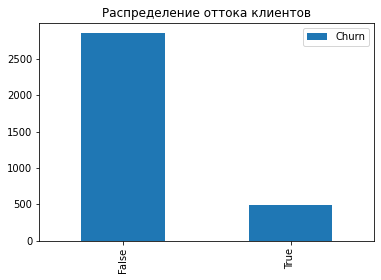

In [69]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

In [70]:
483/(2850+483)

0.14491449144914492

Видим, что уходят около 15% клиентов.  
Теперь перейдем к анализу регрессоров. Их можно разбить на несколько категорий:
- категориальные: `State`, `Area code`;
- бинарные: `International plan`, `Voice mail plan`;
- количественные: все остальные.

Построим корреляционную матрицу для количественных переменных:

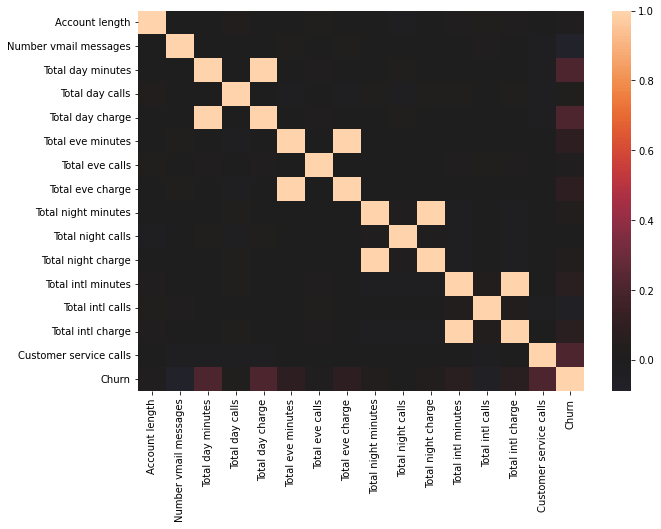

In [71]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, center=0);

Видим, что есть 4 группы, в которых переменные линейно зависят друг от друга (скорее всего вычисляются на основе друг друга, например `Total day charge` считается по проговоренным минутам `Total day minutes` или количеству звонков `Total day calls`). Такие переменные лучше удалить.


Тепеь построим распределения оставшихся количественных признаков:

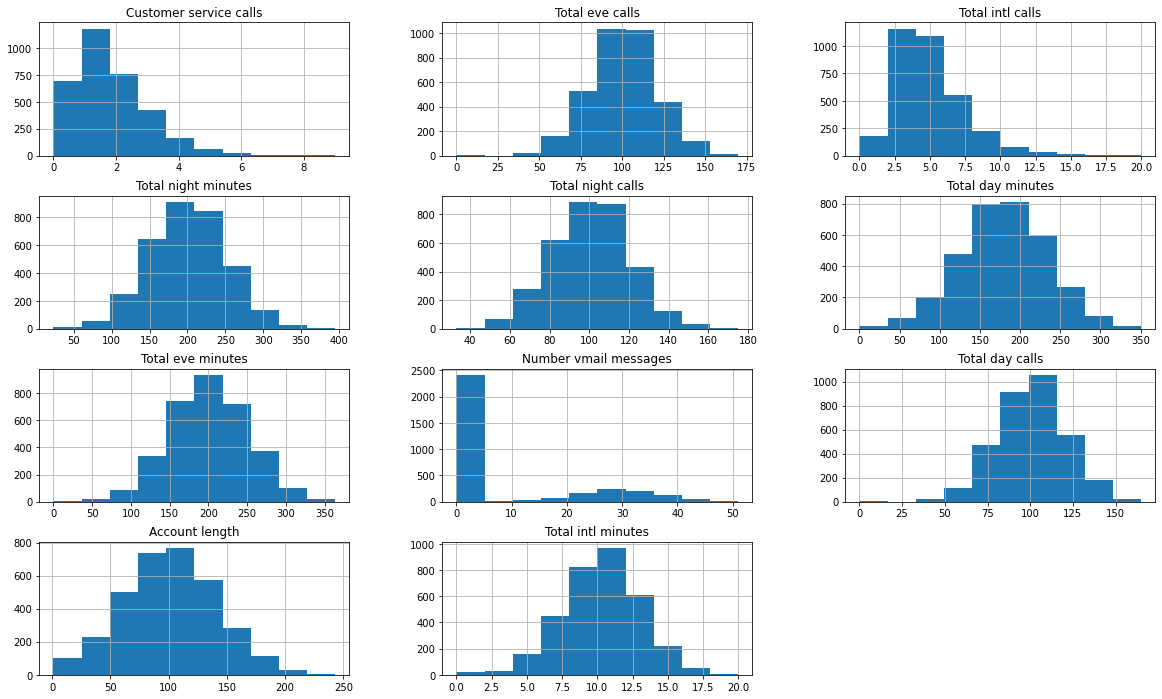

In [72]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

Видим, что распределение большинства признаков похоже на нормальное. Исключения:
- число звонков в сервисный центр (`Customer service calls`) - больше похоже на распределение Пуассона;
- число голосовых сообщений (`Number vmail messages`) - имеется много нулевых значений (скорее всего те, у кого не подключена эта услуга) 
- число международных звонков (`Total intl calls`) - также имеется сдвиг влево.

Построим еще точечные графики с дополнительной разбивкой по целевой переменной:

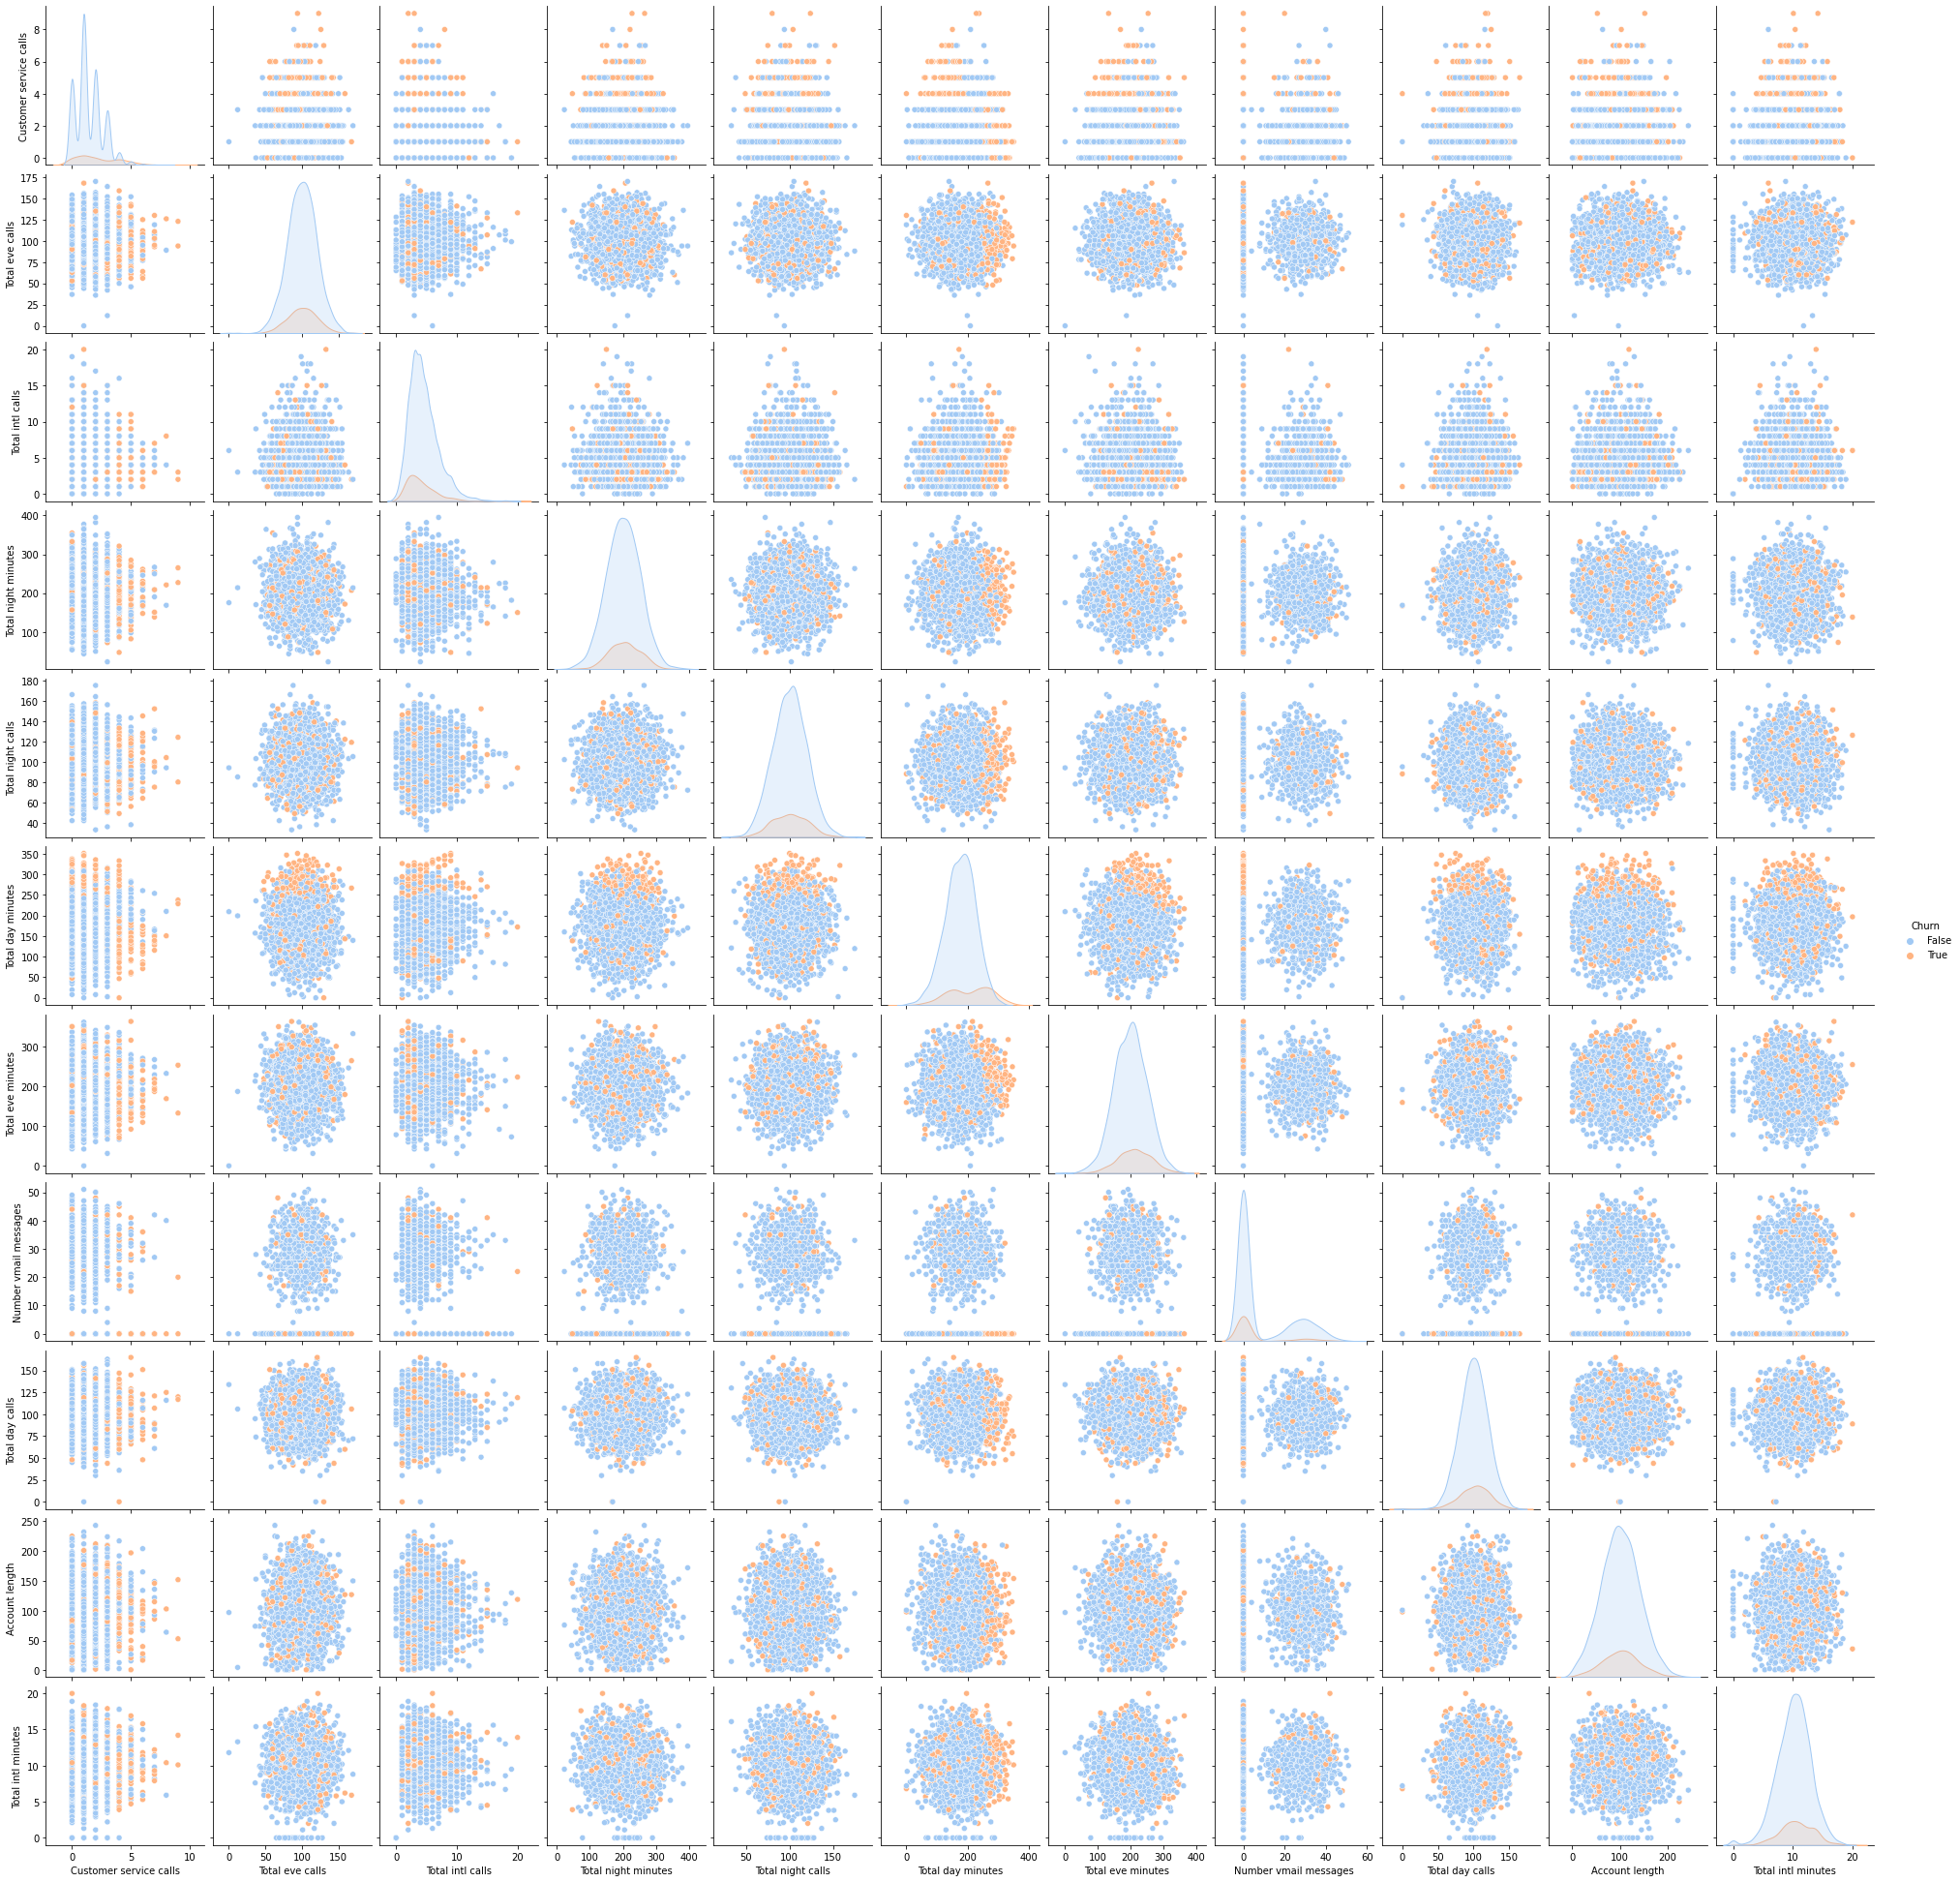

In [73]:
sns.pairplot(df[features + ['Churn']], hue='Churn', palette='pastel');

Видим, что большинство уходящих пользователей разговаривают большее количество минут (что странно).

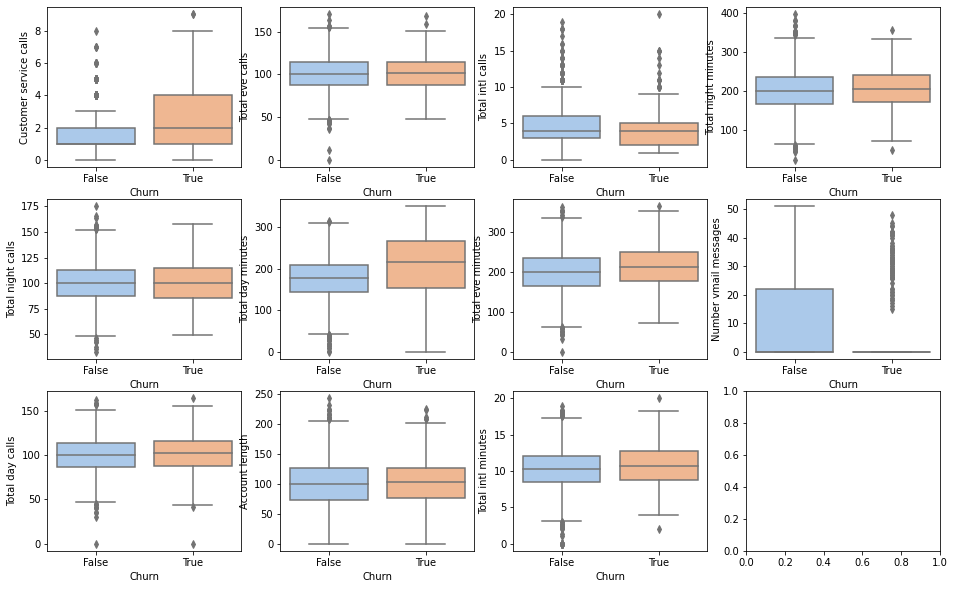

In [99]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, feat in enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx // 4, idx % 4], palette='pastel')
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

Видим, что отличия скорее всего есть по признакам: `Customer service calls`, `Total day minutes`,  и `Number vmail messages`.

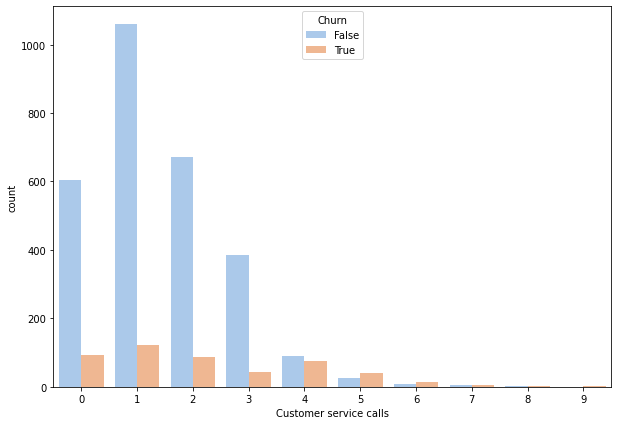

In [75]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='pastel');

Видим, что начиная с 4 звонков в поддержку доля уходящих пользователей увеличивается очень сильно.

Теперь посмотрим на связь бинарных признаков `International plan` и `Voice mail plan` с оттоком:

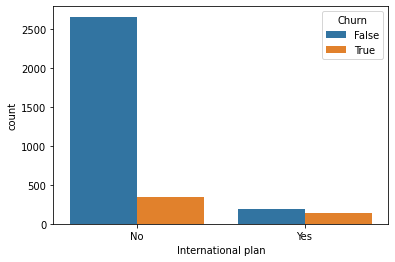

In [79]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что при подключенном роуминге доля оттока намного выше.

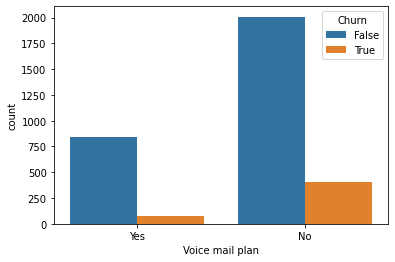

In [78]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df);

Тут уже не видим выражженных отличий

Наконец, посмотрим, как с оттоком связаны категориальные признаки `State` и `Area code`:

In [85]:
df.groupby(['State'])['Churn'].mean().sort_values(ascending=False)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: Churn, dtype: float64

In [86]:
df.groupby(['Area code'])['Churn'].mean().sort_values(ascending=False)

Area code
510    0.148810
408    0.145585
415    0.142598
Name: Churn, dtype: float64

Видим, что для `State` есть явные отличия по доле уходящих клиентов (>25% для штата NJ и <5% для HI), а для `Area code` таких отличий нет. Но эти выводы построены на слишком малой статистике и возможно, это просто случайность.

### Feature engineering и гипотезы

- Из количечественных переменных лучше взять те, в которых явно просматривается отличие в разрезе `Churn`. К ним относятся `Customer service calls`, `Total day minutes`, и `Number vmail messages`.
    - `Customer service calls` - чем больше люди звонят в поддержку, тем вероятнее, что они отвалятся (как выяснили, если звонят больше 4 раз, то там уже больше отвалившихся, возможно из этого можно сделать хорошую dummy-переменную);
    - `Total day minutes` - чем дольше люди разговаривают, тем вероятнее, что они отвалятся (странно, но по данным это так);
    - `Number vmail messages` - чем больше люди отправляют vmail, тем менее вероятно, что они отвалятся.
- Из бинарных переменных лучше взять `International plan`:
    - при подключенном роуминге люди отваливаются чаще (еще одна dummy-переменная).
- Из категориальных перемеет смысл работать со `State` - тоже сделать dummy (но их будет много).   

### Logit и Probit модели

In [ ]:
import statsmodels.api as sm

In [103]:
df_ = df[['Churn', 'Customer service calls', 'Total day minutes', 'Number vmail messages']]
df_ = pd.concat([df_, pd.get_dummies(df['International plan'], prefix='International_plan')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df['State'], prefix='State')], axis=1)
df_.head()

,Churn,Customer service calls,Total day minutes,Number vmail messages,International_plan_No,International_plan_Yes,State_AK,State_AL,State_AR,State_AZ,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,False,1,265.1,25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,161.6,26,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,243.4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,2,299.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,3,166.7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Зафиттим логит-модель:

In [152]:
logit_model = sm.Logit(endog=df_.Churn, exog=exog).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.324902
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3278
Method:                           MLE   Df Model:                           54
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.2148
Time:                        16:07:20   Log-Likelihood:                -1082.9
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 1.093e-91
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8292        nan        nan        nan         nan         nan
Customer service calls     0.5062      0.040     12.739      0.000       0.428       0.584
Total day minutes          0.0126      0.001     11.684      0.000       0.010       0.015
Number vmail messages     -0.0265      0.005     -5.606      0.000      -0.036      -0.017
International_plan_No     -2.4650   4.13e+06  -5.97e-07      1.000   -8.09e+06    8.09e+06
International_plan_Yes    -0.3643   4.13e+06  -8.82e-08      1.000   -8.09e+06    8.09e+06
State_AK                  -0.9715   4.48e+06  -2.17e-07      1.000   -8.78e+06    8.78e+06
State_AL                  -0.5634   4.48e+06  -1.26e-07      1.000   -8.78e+06    8.78e+06
State_AR                   0.1448   4.48e+06   3.23e-08      1.000   -8.78e+06    8.78e+06
State_AZ                  -0.8153   4.48e+06  -1.82e-07      1.000   -8.78e+06    8.78e+06
State_CA                   0.9681   4.48e+06   2.16e-07      1.000   -8.78e+06    8.78e+06
State_CO                  -0.1673   4.48e+06  -3.74e-08      1.000   -8.78e+06    8.78e+06
State_CT                   0.2587   4.48e+06   5.78e-08      1.000   -8.78e+06    8.78e+06
State_DC                  -0.0670   4.48e+06   -1.5e-08      1.000   -8.78e+06    8.78e+06
State_DE                  -0.0295   4.48e+06  -6.59e-09      1.000   -8.78e+06    8.78e+06
State_FL                  -0.1686   4.48e+06  -3.77e-08      1.000   -8.78e+06    8.78e+06
State_GA                  -0.1224   4.48e+06  -2.73e-08      1.000   -8.78e+06    8.78e+06
State_HI                  -1.0618   4.48e+06  -2.37e-07      1.000   -8.78e+06    8.78e+06
State_IA                  -0.6085   4.48e+06  -1.36e-07      1.000   -8.78e+06    8.78e+06
State_ID                  -0.0769   4.48e+06  -1.72e-08      1.000   -8.78e+06    8.78e+06
State_IL                  -0.9101   4.48e+06  -2.03e-07      1.000   -8.78e+06    8.78e+06
State_IN                  -0.3008   4.48e+06  -6.72e-08      1.000   -8.78e+06    8.78e+06
State_KS                   0.3214   4.48e+06   7.18e-08      1.000   -8.78e+06    8.78e+06
State_KY                   0.0070   4.48e+06   1.57e-09      1.000   -8.78e+06    8.78e+06
State_LA                  -0.4423   4.48e+06  -9.88e-08      1.000   -8.78e+06    8.78e+06
State_MA                   0.3591   4.48e+06   8.02e-08      1.000   -8.78e+06    8.78e+06
State_MD                   0.3261   4.48e+06   7.28e-08      1.000   -8.78e+06    8.78e+06
State_ME                   0.4587   4.48e+06   1.02e-07      1.000   -8.78e+06    8.78e+06
State_MI                   0.5410   4.48e+06   1.21e-07      1.000   -8.78e+06    8.78e+06
State_MN                   0.3367   4.48e+06   7.52e-08      1.000   -8.78e+06    8.78e+06
State_MO                  -0.2318   4.48e+06  -5.18e-08      1.000   -8.78e+06    8.78e+06
State_MS                   0.4824   4.48e+06   1.08e-07      1.000   -8.78e+06    8.78e+06
State_MT                   0.9190   4.48e+06   2.05e-07 

Зафиттим пробит-модель:

In [153]:
probit_model = sm.Probit(endog=df_.Churn, exog=exog).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.324215
         Iterations 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3278
Method:                           MLE   Df Model:                           54
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.2165
Time:                        16:07:22   Log-Likelihood:                -1080.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 1.349e-92
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5627        nan        nan        nan         nan         nan
Customer service calls     0.2836      0.021     13.264      0.000       0.242       0.325
Total day minutes          0.0068      0.001     11.999      0.000       0.006       0.008
Number vmail messages     -0.0139      0.002     -5.637      0.000      -0.019      -0.009
International_plan_No     -1.3838        nan        nan        nan         nan         nan
International_plan_Yes    -0.1789        nan        nan        nan         nan         nan
State_AK                  -0.5398        nan        nan        nan         nan         nan
State_AL                  -0.3571        nan        nan        nan         nan         nan
State_AR                   0.0481        nan        nan        nan         nan         nan
State_AZ                  -0.4134        nan        nan        nan         nan         nan
State_CA                   0.5424        nan        nan        nan         nan         nan
State_CO                  -0.0947        nan        nan        nan         nan         nan
State_CT                   0.1219        nan        nan        nan         nan         nan
State_DC                  -0.0363        nan        nan        nan         nan         nan
State_DE                  -0.0433        nan        nan        nan         nan         nan
State_FL                  -0.0706        nan        nan        nan         nan         nan
State_GA                  -0.0838        nan        nan        nan         nan         nan
State_HI                  -0.5781        nan        nan        nan         nan         nan
State_IA                  -0.3688        nan        nan        nan         nan         nan
State_ID                  -0.0468        nan        nan        nan         nan         nan
State_IL                  -0.5078        nan        nan        nan         nan         nan
State_IN                  -0.1533        nan        nan        nan         nan         nan
State_KS                   0.1549        nan        nan        nan         nan         nan
State_KY                  -0.0433        nan        nan        nan         nan         nan
State_LA                  -0.1726        nan        nan        nan         nan         nan
State_MA                   0.1649        nan        nan        nan         nan         nan
State_MD                   0.1728        nan        nan        nan         nan         nan
State_ME                   0.2530        nan        nan        nan         nan         nan
State_MI                   0.2750        nan        nan        nan         nan         nan
State_MN                   0.1486        nan        nan        nan         nan         nan
State_MO                  -0.1681        nan        nan        nan         nan         nan
State_MS                   0.2798        nan        nan        nan         nan         nan
State_MT                   0.4882        nan        nan 

### Метрики качества

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
y_pred_logit = np.where(logit_model.predict(exog) > 0.5, 1, 0)
y_pred_probit = np.where(probit_model.predict(exog) > 0.5, 1, 0)

In [156]:
confusion_matrix(y_true=df['Churn'], y_pred=y_pred_logit)

array([[2772,   78],
       [ 380,  103]], dtype=int64)

In [157]:
TP_logit = np.sum((y_pred_logit == 1) & (df['Churn'] == 1))
FP_logit = np.sum((y_pred_logit == 0) & (df['Churn'] == 1))
FN_logit = np.sum((y_pred_logit == 1) & (df['Churn'] == 0))
TN_logit = np.sum((y_pred_logit == 0) & (df['Churn'] == 0))
TP_logit, FP_logit, FN_logit, TN_logit

(103, 380, 78, 2772)

In [158]:
confusion_matrix(y_true=df['Churn'], y_pred=y_pred_probit)

array([[2774,   76],
       [ 390,   93]], dtype=int64)

In [159]:
TP_probit = np.sum((y_pred_probit == 1) & (df['Churn'] == 1))
FP_probit = np.sum((y_pred_probit == 0) & (df['Churn'] == 1))
FN_probit = np.sum((y_pred_probit == 1) & (df['Churn'] == 0))
TN_probit = np.sum((y_pred_probit == 0) & (df['Churn'] == 0))
TP_probit, FP_probit, FN_probit, TN_probit

(93, 390, 76, 2774)

Видим, что по confusion_matrix логит-модель выглядит лучше

In [169]:
from sklearn.metrics import precision_score

In [170]:
precision_score(y_true = df['Churn'], y_pred= y_pred_logit)

0.569060773480663

In [172]:
precision_score(y_true = df['Churn'], y_pred= y_pred_probit)

0.5502958579881657

Видим, что по метрике точности (precision) логит-модель лучше

In [174]:
from sklearn.metrics import recall_score

In [166]:
recall_score(y_true = df['Churn'], y_pred= y_pred_logit)

0.21325051759834368

In [167]:
recall_score(y_true = df['Churn'], y_pred= y_pred_probit)

0.19254658385093168

Видим, что по метрике полноты (recall) логит-модель лучше

In [160]:
from sklearn.metrics import roc_curve, auc, f1_score

In [161]:
f1_score(y_true = df['Churn'], y_pred= y_pred_logit)

0.31024096385542166

In [162]:
f1_score(y_true = df['Churn'], y_pred= y_pred_probit)

0.2852760736196319

Видим, что по F1-мере логит-модель снова оказывается лучше

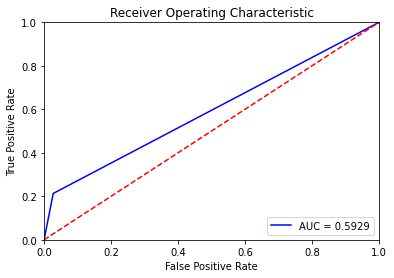

In [163]:
fpr, tpr, threshold = roc_curve(df['Churn'], y_pred_logit)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

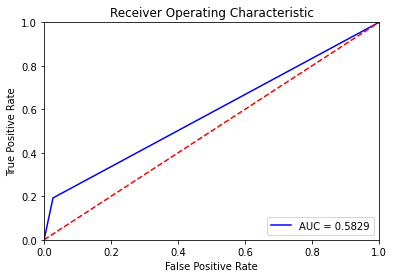

In [164]:
fpr, tpr, threshold = roc_curve(df['Churn'], y_pred_probit)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Видим, что и по AUC ROC логит лучше

Таким образом, **логит-модель** показывает результаты слегка лучше (по всем метрикам качества), поэтому она выглядит предпочтительнее пробит-модели.

Остальное, к сожалению, не успел(